Introduction
- Customer churn is when the customers or subscribers discontinue doing business with a firm or service. 
- Customer churn can result  to revenue loss and damaged reputation.


Problem Statement and Background
- Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. It is well known that it is more expensive to acquire a new customer than to keep an existing customer. 
- The company then targets those customers with special programs or incentives.
- To detect early signs of potential churn, I will focus on different attributes like Churn reason, Churn label, Monthly charges, Streamin TV etc.


Objectives
1. What's the % of Churn Customers and customers that keep in with the active services?
2. Is there any patterns in Churn Customers based on the monthly charges?
3. Is there any patterns in Churn Customers based on the gender?
4. Is there any patterns/preference in Churn Customers based on the type of service provided?
5. Many more questions that will arise during the analysis


In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

1. UNDERSTANDING THE DATA

In [3]:
#import the dataset
data = pd.read_csv('Telco_customer_churn.csv')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
data.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)


The data set includes information about:

Customers who left – the column is called Churn Label

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - contract, Paperless Billing, Payment Method, payment method, Monthly Charges,Total Charges 
paperless billing, monthly charges, and total charges

Demographic info about customers – Customer ID, Gender, Senior Citizen, Partner, Dependents

Customer primary residence Infomation- Country, State, Zip Code, Lat Long, Latitude, Longitude

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn

In [5]:
# shape of the dataset
data.shape

(7043, 33)

In [6]:
## Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
#Total Charges column has a object data type but it is numerical data, so let's change data type for this column.
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

2. Missing/Duplicate values

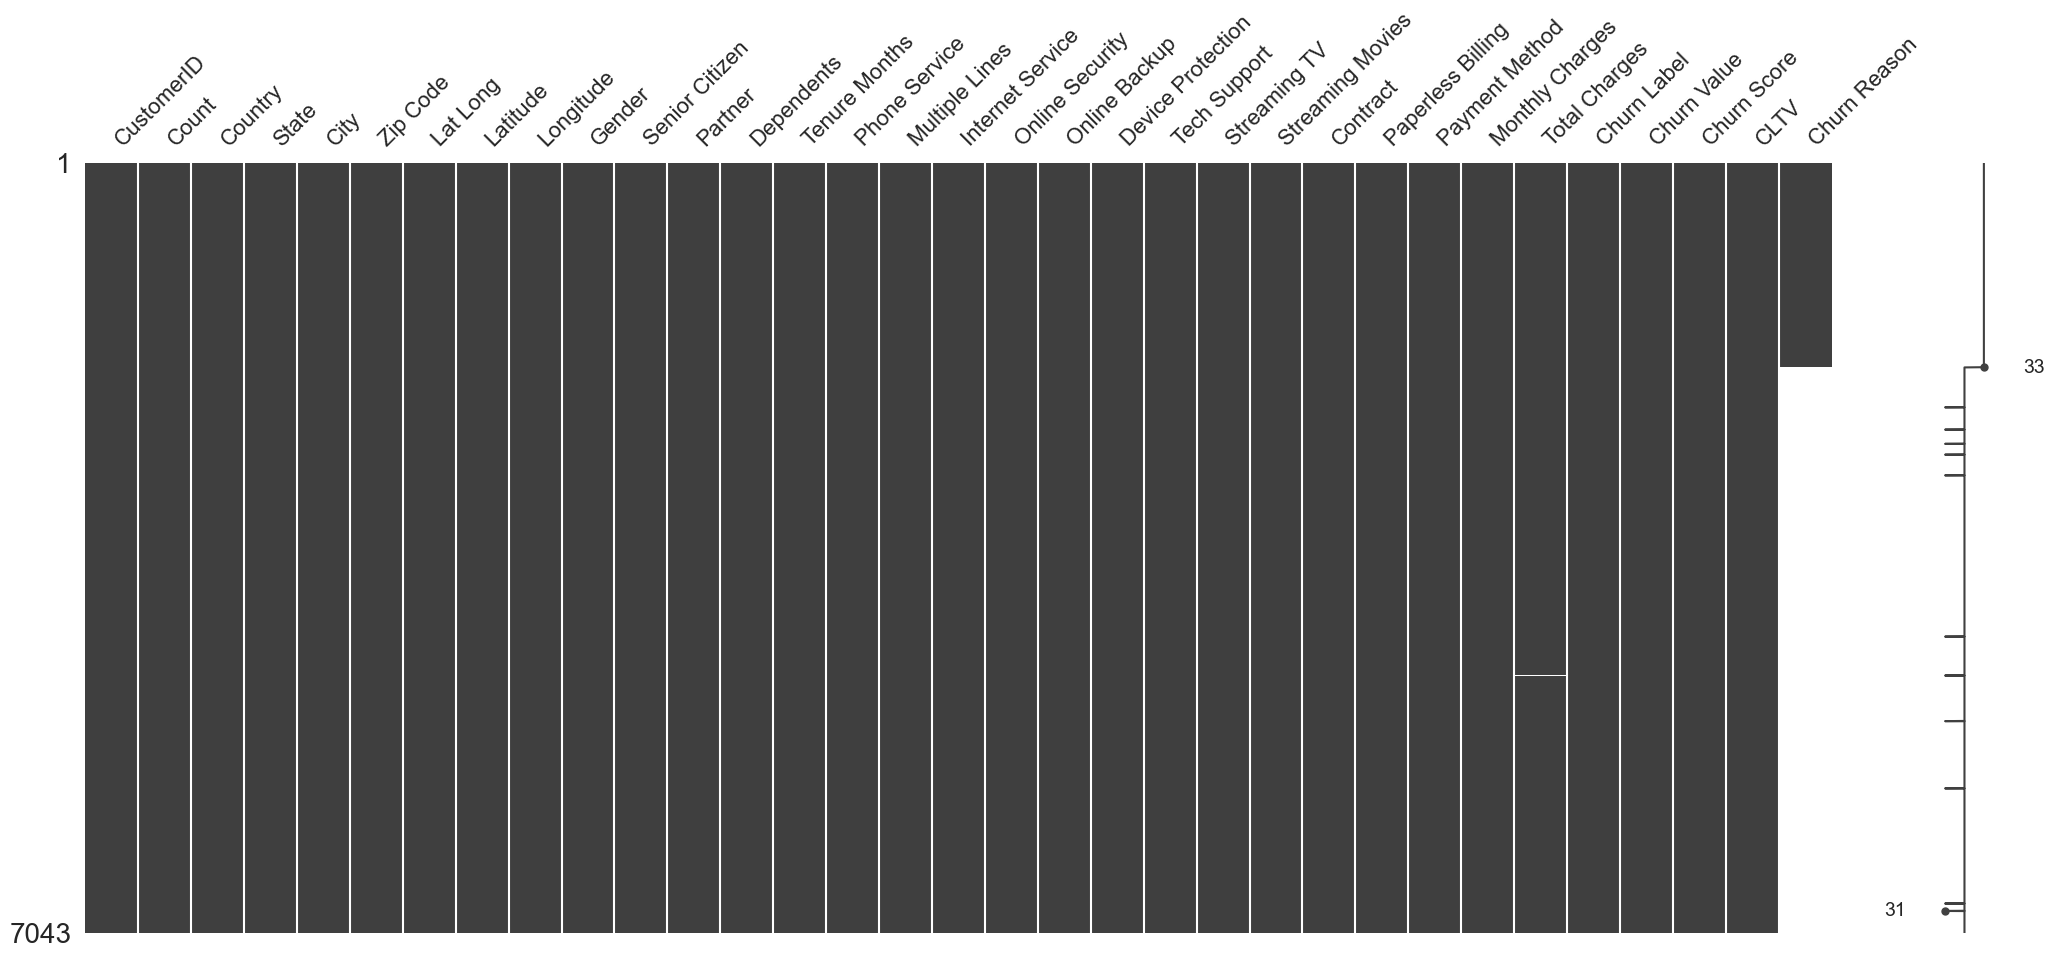

In [8]:
# Visualize missing values 
# Visualize missing values as a matrix

msno.matrix(data);

Using this matrix we can very quickly find the pattern of missingness in the dataset
From the above visualisation we can observe that churn reason has alot of missing values

In [9]:
#Checking the mising valuse 
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

There are:

11 missing values in the Total Charges column
5174 values in the Churn Reason column.

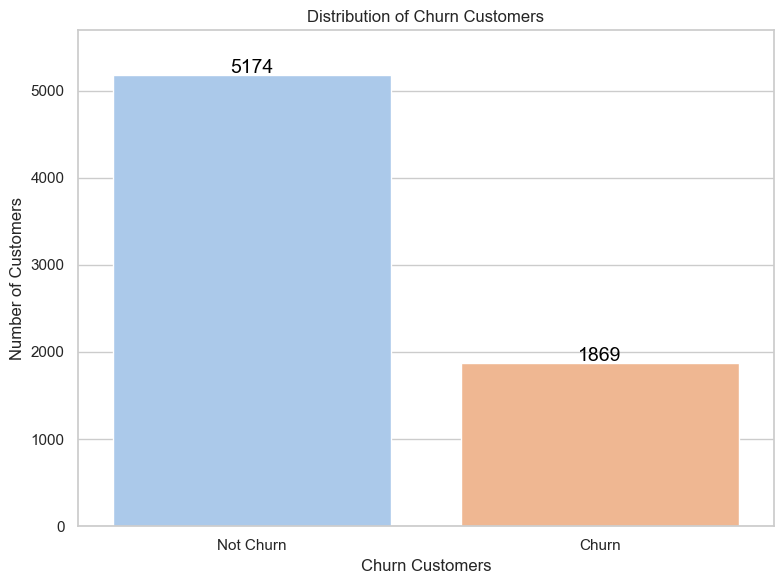

In [10]:
#What might be the reason for too many missing values in the Churn Reason column? 

# number of customers who churned and not churned
exit_counts = data['Churn Value'].value_counts()
exit_percentages = exit_counts

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
ax = sns.barplot(x=exit_counts.index, y=exit_counts.values, palette='pastel')
ax.set(xlabel='Churn Customers', ylabel='Number of Customers', title='Distribution of Churn Customers')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.ylim(top=max(exit_counts.values)*1.1)

# add counting number on top of each bar
for i, v in enumerate(exit_percentages):
    ax.text(i, exit_counts.values[i]+30, f'{v}', fontsize=14, color='black', ha='center')

plt.tight_layout()
plt.show()


5174 is the exact value of not churn customers. So that in case the customers don’t churn, they wouldn’t have a reason for it.

In [11]:
#Filling Total charges null values

data[data['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [12]:
#Since total charges is equal to Monthly Charges * Tenure Months, we can easily get the approximate values of the Total Charges column.

#Calculating charges:
data['calc_charges'] = data['Monthly Charges'] * data['Tenure Months']
data['Total Charges'] = np.where(data['Total Charges'].isna() == True,data['calc_charges'], data['Total Charges'])
data = data.drop(['calc_charges'], axis=1)

data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [13]:
# checking on null values
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [14]:
# Checking on duplicates

duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  0


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


EXPLORATORY DATA ANALYSIS

In [15]:
#Basic statistical analysis of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Total Charges,7043.0,2279.734304,2266.794470,0.000000,398.550000,1394.550000,3786.600000,8684.800000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


1. Gender and Churn Label

In [16]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn Label'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

26.5 % of customers Churned.
Customers are 49.5 % female and 50.5 % male.

2. Churn reason

In [17]:
# 26.5% of customers have stopped using our service. Visualize reasons they stopped using the services in ascending order

values= data['Churn Reason'].value_counts(ascending=False).values
keys= data['Churn Reason'].value_counts(ascending=False).keys()

fig = px.bar(x=keys, y=values, color = values, text = values)

fig.update_layout(
    yaxis_title="Churn Reason",
    xaxis_title="Count"
)
fig.show()

From the graph, churn reasons can be dividedinto two main categories

Internal :- Internal churn reasons are those that are within the company's control, such as Attitude of support Person, Attitude of service provider, product quality, service quality, and price..

External :- External churn reasons are those that are outside of the company's control, such as competitor offerings and network reliability.

Actions that that can be taken :-

The focus should be on improving product and service quality, and reducing prices, in order to address the top three churn reasons.
It is also important to improve customer support, as this is major churn driver.
The company should monitor competitor offerings and network reliability, and make adjustments as needed.

3. Senior citizen and partner

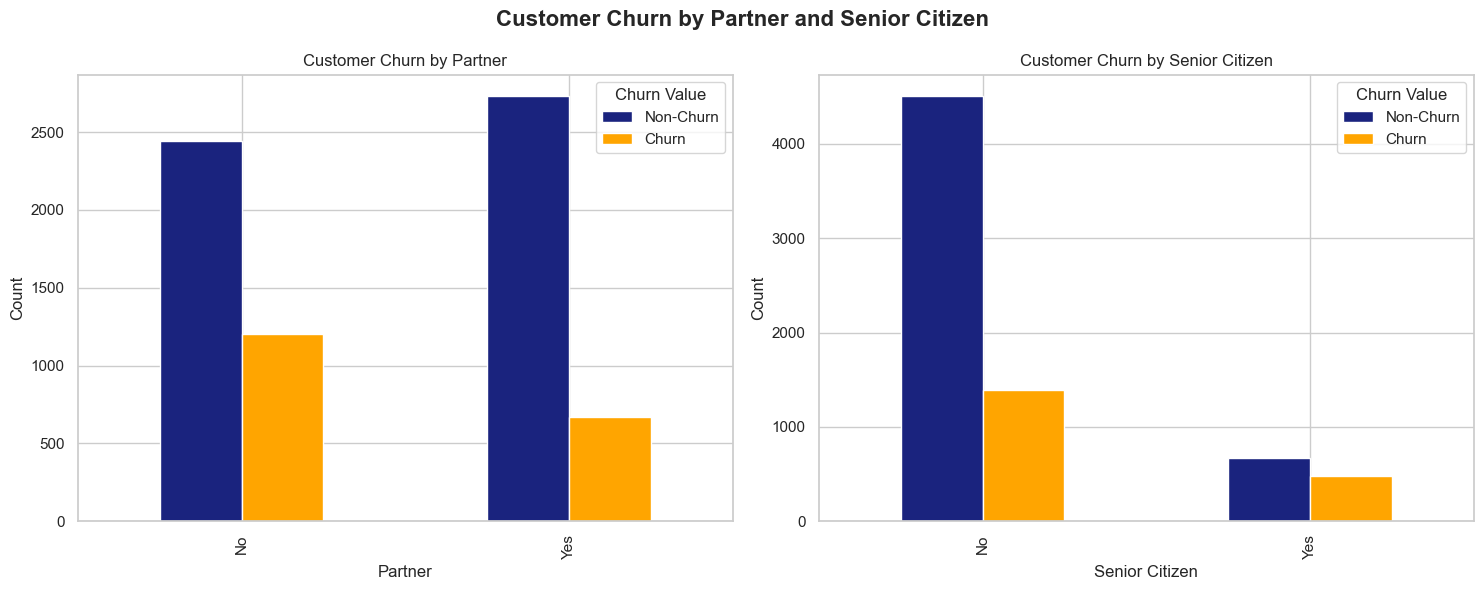

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))

colors = ['#1a237e', '#FFA500'] 
partner_churn = data.groupby(['Partner', 'Churn Value'])['Churn Value'].count().unstack().plot(ax=ax1, kind='bar', color=colors)
ax1.set_xlabel('Partner')
ax1.set_ylabel('Count')
ax1.set_title('Customer Churn by Partner')
ax1.legend(['Non-Churn', 'Churn'], title='Churn Value', loc='upper right')

senior_churn = data.groupby(['Senior Citizen', 'Churn Value'])['Churn Value'].count().unstack().plot(ax=ax2, kind='bar', color=colors)
ax2.set_xlabel('Senior Citizen')
ax2.set_ylabel('Count')
ax2.set_title('Customer Churn by Senior Citizen')
ax2.legend(['Non-Churn', 'Churn'], title='Churn Value', loc='upper right')

plt.suptitle('Customer Churn by Partner and Senior Citizen', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Senior citizens are more likely to churn.
Customers with partners are less likely to churn.

4. Internet services

In [19]:
fig = px.pie(data.groupby(['Internet Service','Churn Label'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
             facet_col = 'Churn Label',
             names='Internet Service',
            title = 'What type of internet was connected to the clients who left the service?')
fig.show()

69.4% were connected to the fiber optic Internet
Customers who doesn,t use DSL ot Fiber optic have the least churn rate

5. Tech support

In [20]:
fig = px.pie(data.groupby(['Tech Support','Churn Label'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
             facet_col = 'Churn Label',
             hole = .5,
             names='Tech Support',
            title = 'Tech support option and churn')
fig.show()

77,5% of the customers who left the service did not have the tech support option enabled. Moreover, we can see that among active clients, clients are distributed plus or minus evenly and there is no strong shift towards the absence of this option.

6. Online Security

In [21]:
fig = px.bar(data.groupby(['Internet Service','Online Security',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             #barmode="group",
             text = 'CustomerID',
             facet_col = 'Online Security'
            )
fig.show()

Most of the customers without online security churn

7. Payment method

In [22]:
fig = px.bar(data.groupby(['Payment Method',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Payment Method", 
             color="Churn Label", 
             text = 'CustomerID'
            )
fig.show()

Clients who uses Electronic check are more likely to churn

8. Internet service and payment method

In [23]:
data_churn = data.assign(churn_clients = np.where(data['Churn Label']== 'Yes',data['CustomerID'],None))\
   .groupby(['Payment Method','Internet Service']).agg({'churn_clients':'count'}).reset_index()

churn_clients = data.groupby(['Payment Method','Internet Service'])['CustomerID'].count().reset_index()

churn_data = churn_clients.join(data_churn.set_index(['Payment Method','Internet Service']), on=['Payment Method','Internet Service'])

churn_data

,Payment Method,Internet Service,CustomerID,churn_clients
0,Bank transfer (automatic),DSL,566,53
1,Bank transfer (automatic),Fiber optic,646,187
2,Bank transfer (automatic),No,332,18
3,Credit card (automatic),DSL,594,72
4,Credit card (automatic),Fiber optic,597,151
5,Credit card (automatic),No,331,9
6,Electronic check,DSL,648,207
7,Electronic check,Fiber optic,1595,849
8,Electronic check,No,122,15
9,Mailed check,DSL,613,127


Fiber optic clients have the highest churn rate in all methods

9. Total Charges

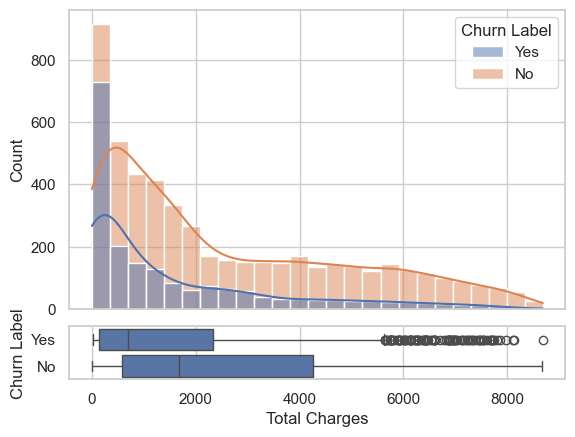

In [24]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})


sns.histplot(data=data, x="Total Charges", hue="Churn Label", ax=ax_hist, kde=True)
ax_hist.set_xlabel("") 


sns.boxplot(data=data, x="Total Charges", y="Churn Label", ax=ax_box)
ax_box.set_xlabel("Total Charges")


plt.subplots_adjust(hspace=0.1)
plt.show()

In [25]:
fig = px.histogram(data, x="Total Charges", color="Churn Label",
                   marginal="box"
                  )
fig.show()

The median is the value in the middle of a data set.
The median charges of customers who have gone into churn are more than 2 times lower than the median charges of customers who use the service.

10. Monthly Charges


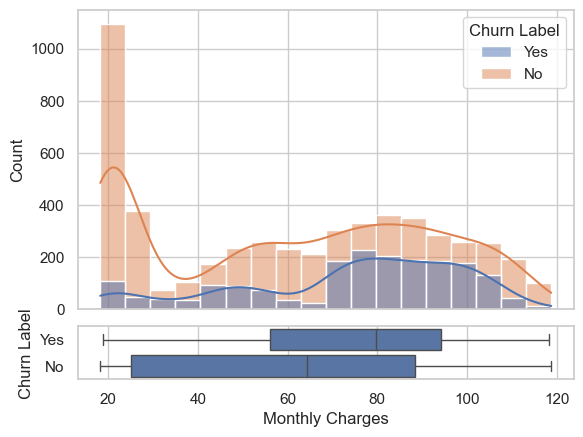

In [26]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

sns.histplot(data=data, x="Monthly Charges", hue="Churn Label", ax=ax_hist, kde=True)
ax_hist.set_xlabel("") 

sns.boxplot(data=data, x="Monthly Charges", y="Churn Label", ax=ax_box)
ax_box.set_xlabel("Monthly Charges") 
plt.subplots_adjust(hspace=0.1)

plt.show()

In [27]:
fig = px.histogram(data, x="Monthly Charges", color="Churn Label",
                   marginal="box"
                  )
fig.show()


The median is the value in the middle of a data set.
The median monthly charges of customers who have left the service are higher than those of customers who are still active. 

DATA PREPROCESSING

In [28]:
#Removing all unimportant columns
data = data.drop(['Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis = 1)

data.head()

,Count,Country,State,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,1,United States,California,Male,No,No,No,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,1,United States,California,Female,No,No,Yes,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,1,United States,California,Female,No,No,Yes,8,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
3,1,United States,California,Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,1,United States,California,Male,No,No,Yes,49,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [29]:
#use ordinal encoding to convert categorical variables to numerical
data['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

data = data.apply(lambda x: encode_data(x))
data.head()

,Count,Country,State,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,1,0,0,1,0,0,0,2,1,0,...,0,0,0,0,0,1,3,53.85,108.15,1
1,1,0,0,0,0,0,1,2,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
2,1,0,0,0,0,0,1,8,1,2,...,2,0,2,2,0,1,2,99.65,820.50,1
3,1,0,0,0,0,1,1,28,1,2,...,2,2,2,2,0,1,2,104.80,3046.05,1
4,1,0,0,1,0,0,1,49,1,2,...,2,0,2,2,0,1,0,103.70,5036.30,1


This is crucial because many machine learning algorithms require numeric input data. By converting categorical data into numeric form, we make the dataset suitable for training and evaluating machine learning models.

Data Balancing

In [30]:
over = SMOTE(sampling_strategy = 1)

x = data.drop("Churn Label", axis = 1).values
y = data['Churn Label'].values

Splitting the data into train and test sets

In [31]:
plt.figure(figsize=(14,7))
data.corr()['Churn Label'].sort_values(ascending = False)

Churn Label          1.000000
Monthly Charges      0.193356
Paperless Billing    0.191825
Senior Citizen       0.150889
Payment Method       0.107062
Multiple Lines       0.038037
Phone Service        0.011942
Gender              -0.008612
Streaming TV        -0.036581
Streaming Movies    -0.038492
Internet Service    -0.047291
Partner             -0.150448
Device Protection   -0.178134
Online Backup       -0.195525
Total Charges       -0.198324
Dependents          -0.248542
Tech Support        -0.282492
Online Security     -0.289309
Tenure Months       -0.352229
Contract            -0.396713
Count                     NaN
Country                   NaN
State                     NaN
Name: Churn Label, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [32]:
# split data into target and features
X = data.drop(columns = ['Churn Label'])
y = data['Churn Label'].values

We split the data data into training and test set to avoid overfitting
A stratified split is used when you have imbalanced classes in your target variable.
It ensures that the distribution of classes in the training and testing sets is similar to the original dataset.
stratify=y makes sure that the class distribution in y is preserved in both the training and testing sets.
X contains the feature data, and y contains the target variable

In a random split, you randomly assign a portion of your data to the training set and the remaining portion to the testing set. This is suitable when your data points are independent and identically distributed (i.i.d)

In [33]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [34]:
# print the size of train and test data
print(X_train.shape, X_test.shape, X.shape)

(4930, 22) (2113, 22) (7043, 22)


In [35]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

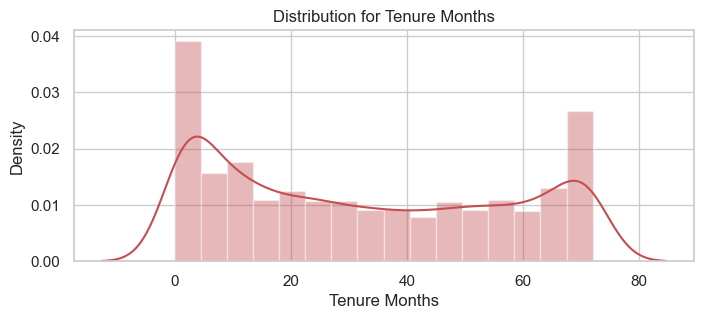

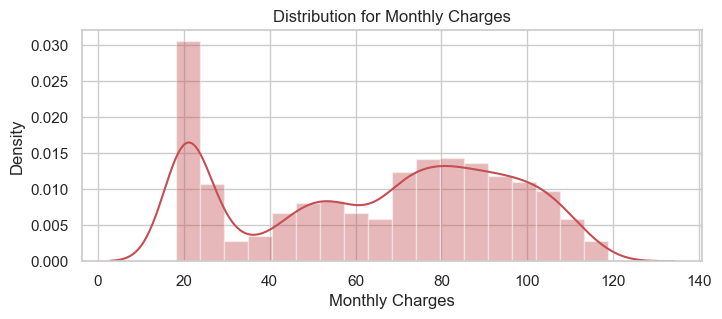

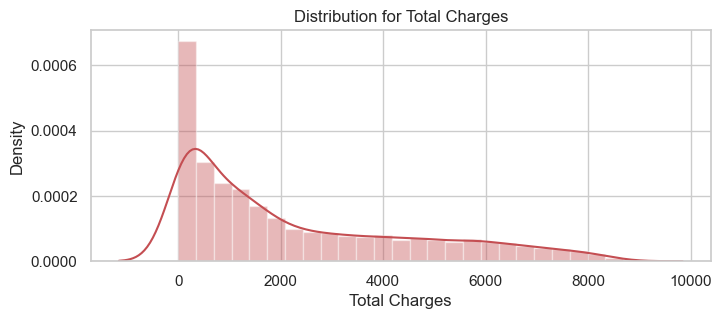

In [36]:
data1 = ["Tenure Months", 'Monthly Charges', 'Total Charges']
for feat in data1: distplot(feat, data)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

Standardizing numeric attributes
Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1

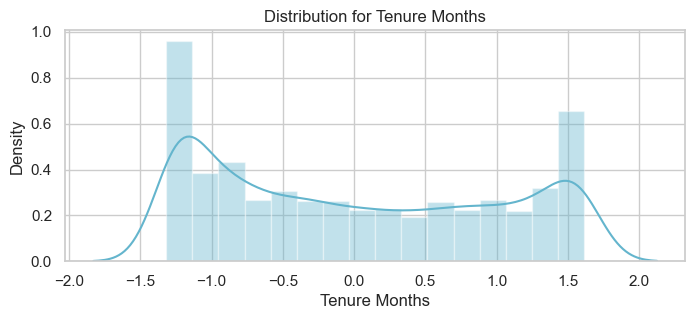

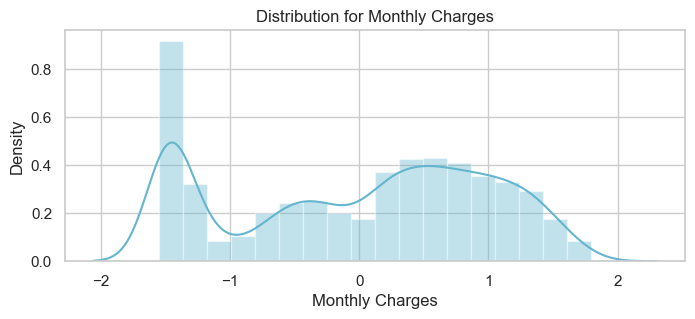

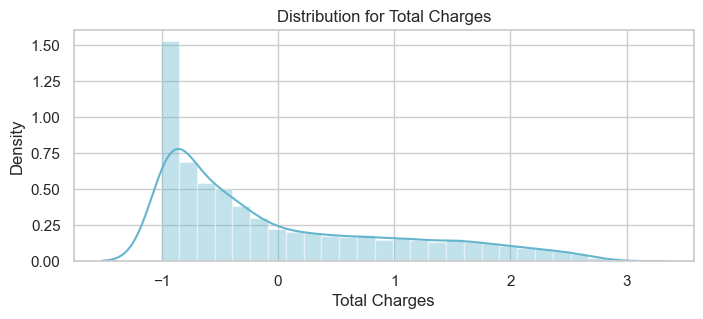

In [37]:
df_std = pd.DataFrame(StandardScaler().fit_transform(data[data1].astype('float64')),
                       columns=data1)
for feat in data1: distplot(feat, df_std, color='c')

In [38]:
# Divide the columns into 3 categories, one for standardisation, one for label encoding and one for encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(data1) - set(cat_cols_ohe)) #those that need label encoding

In [39]:
scaler= StandardScaler()

X_train[data1] = scaler.fit_transform(X_train[data1])
X_test[data1] = scaler.transform(X_test[data1])

MODEL EVALUATION AND PREDICTION

1. KNN- Neighbors

In [40]:
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(X_train,y_train)*100)
print(knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1552
           1       0.56      0.55      0.55       561

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.76      0.76      0.76      2113

[[1308  244]
 [ 253  308]]
Training Score:  83.184584178499
0.7647893989588264


In [41]:
print(accuracy_score(y_test,y_pred)*100)

76.47893989588263


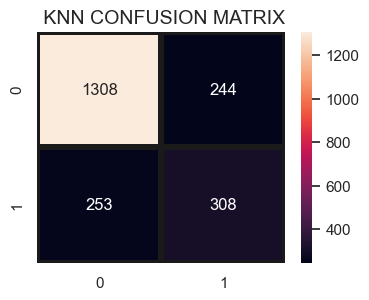

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" KNN CONFUSION MATRIX",fontsize=14)
plt.show()

There are total 1308+244=1552 actual non-churn values and the algorithm predicts 1308 of them as non churn and 244 of them as churn. While there are 254+307=561 actual churn values and the algorithm predicts 254 of them as non churn values and 307 of them as churn values.

2. Random Forest

In [43]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1552
           1       0.62      0.56      0.59       561

    accuracy                           0.79      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113

[[1363  189]
 [ 246  315]]
Training Score:  99.81744421906694


In [45]:
print(accuracy_score(y_test,y_pred)*100)

79.41315664931378


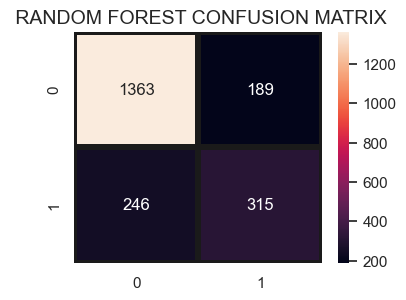

In [46]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

There are total 1352+200=1552 actual non-churn values and the algorithm predicts 1352 of them as non churn and 200 of them as churn. While there are 259+302=561 actual churn values and the algorithm predicts 259 of them as non churn values and 302 of them as churn values.

3. Logistic regression

In [47]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1552
           1       0.62      0.61      0.61       561

    accuracy                           0.80      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.80      0.80      0.80      2113

[[1340  212]
 [ 218  343]]
Training Score:  81.72413793103448


In [49]:
print(accuracy_score(y_test,y_pred)*100)

79.649787032655


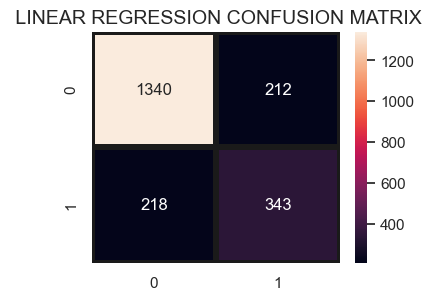

In [50]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" LINEAR REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

There are total 1340+212=1552 actual non-churn values and the algorithm predicts 1340 of them as non churn and 212 of them as churn. While there are 218+343=561 actual churn values and the algorithm predicts 218 of them as non churn values and 343 of them as churn values.

4. Decision Tree Classifier

In [51]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [52]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1552
           1       0.60      0.64      0.62       561

    accuracy                           0.79      2113
   macro avg       0.73      0.74      0.74      2113
weighted avg       0.79      0.79      0.79      2113

[[1310  242]
 [ 203  358]]
Training Score:  81.5212981744422


In [53]:
print(accuracy_score(y_test,y_pred)*100)

78.93989588263133


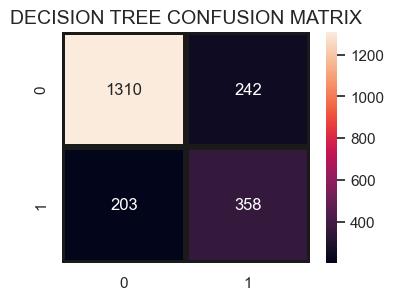

In [54]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CONFUSION MATRIX",fontsize=14)
plt.show()

There are total 1310+242=1552 actual non-churn values and the algorithm predicts 1310 of them as non churn and 242 of them as churn. While there are 203+3358=561 actual churn values and the algorithm predicts 203 of them as non churn values and 358 of them as churn values.

5. Gradient Boosting Classifier

In [55]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [56]:
y_pred=gbc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gbc.score(X_train,y_train)*100)
print(gbc.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1552
           1       0.65      0.59      0.62       561

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

[[1376  176]
 [ 229  332]]
Training Score:  84.13793103448276
0.808329389493611


In [57]:
print(accuracy_score(y_test,y_pred)*100)

80.8329389493611


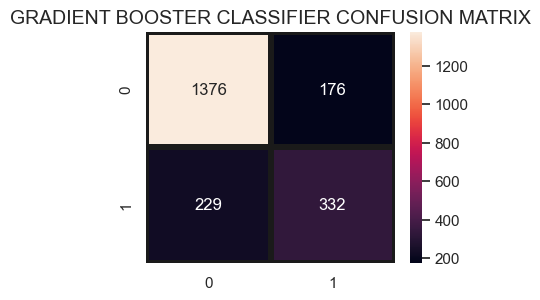

In [58]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("GRADIENT BOOSTER CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

There are total 1376+176=1552 actual non-churn values and the algorithm predicts 1376 of them as non churn and 176 of them as churn. While there are 229+332=561 actual churn values and the algorithm predicts 229 of them as non churn values and 332 of them as churn values.

6. XG Boost

In [66]:
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7818267865593942

In [67]:
print(accuracy_score(y_test,y_pred)*100)

76.00567912920019


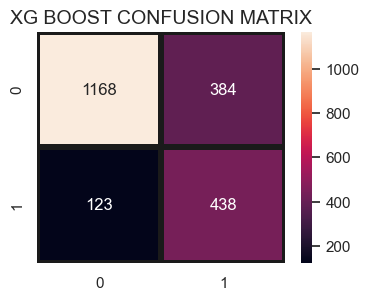

In [68]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XG BOOST CONFUSION MATRIX",fontsize=14)
plt.show()

There are total 1340+212=1552 actual non-churn values and the algorithm predicts 1340 of them as non churn and 212 of them as churn. While there are 218+343=561 actual churn values and the algorithm predicts 218 of them as non churn values and 343 of them as churn values.

CONCLUSION

Gradient Boosting Classifier is the most accurate model with accuracy score of 80.83
Gradient boosting is an ensemble learning technique that builds an additive model by iteratively fitting weak learners (usually decision trees) to the negative gradient of the loss function with respect to the current model. It aims to minimize the loss function by combining multiple weak learners in a weighted manner.

Customer churn prediction has become an important issue of customer relationship management to retain valuable customers. Therefore by performing research, key factors of churn to retain customers and their influence on churn will be well understood.
Proper churn management can save a huge amount of money for the company. Thus the economic value of customer retention can be summarized as:
- satisfied customers can bring new customers
- long-term customers usually do not get influenced much by competitors
- long-term customers tend to buy more
- company can focus on satisfying existing customer’s needs
- lost customers share negative experiences and thus will have a negative influence on the image of the company

Thus customer retention as a function of i.e. {Price, service quality, customer satisfaction, brand image} could lead to better customer loyalty.